# Model Validation

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

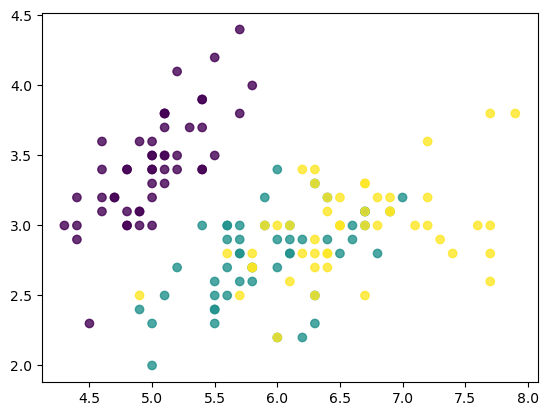

In [9]:
iris = load_iris()

x = iris.data
y = iris.target

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Text(0.5, 1.0, 'Test')

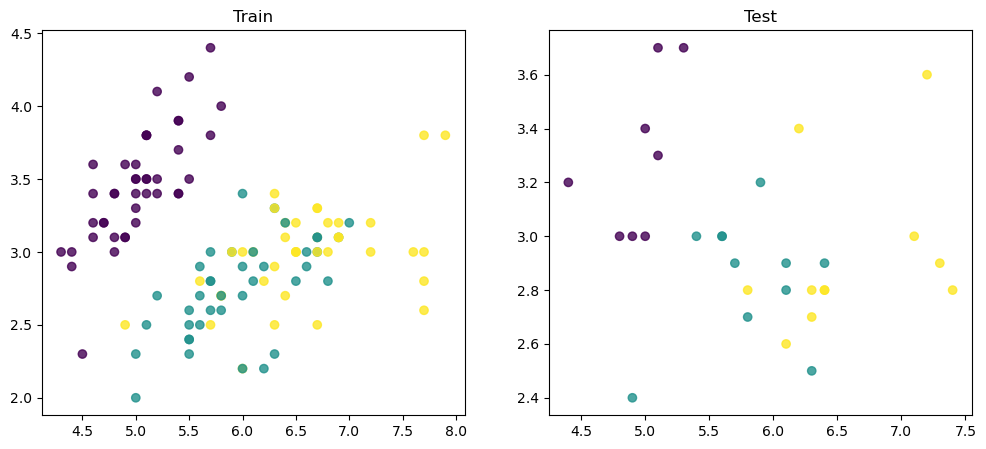

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test')

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

## Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy').mean()

0.9583333333333334

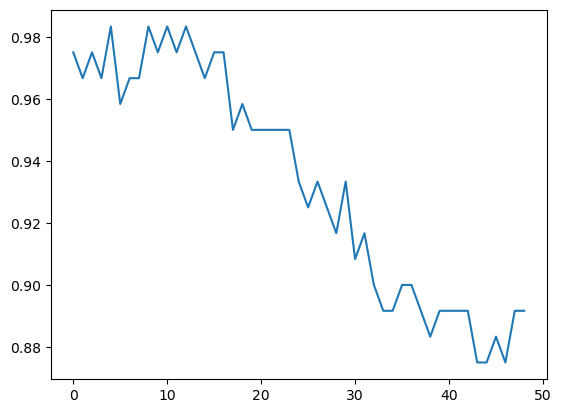

In [25]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

In [28]:
from sklearn.model_selection import validation_curve

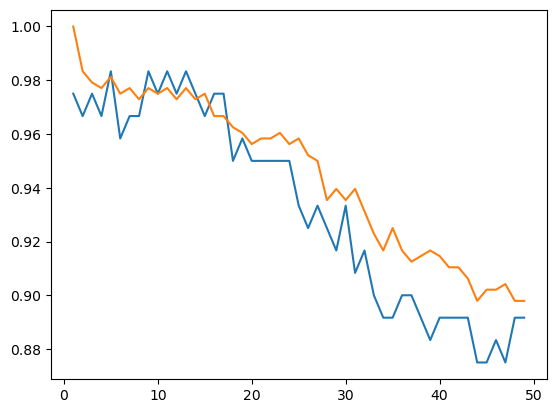

In [31]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, x_train, y_train, param_name='n_neighbors', param_range=k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

## Grid Search CV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'n_neighbors':np.arange(1,20),
                'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [34]:
grid.best_score_

0.9833333333333334

In [35]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [36]:
model = grid.best_estimator_

In [37]:
model.score(x_test, y_test)

0.9333333333333333

## Confision Matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

## Learning Curve

In [42]:
from sklearn.model_selection import learning_curve

In [50]:
N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes= np.linspace(0.1,1.0,20), cv=5)

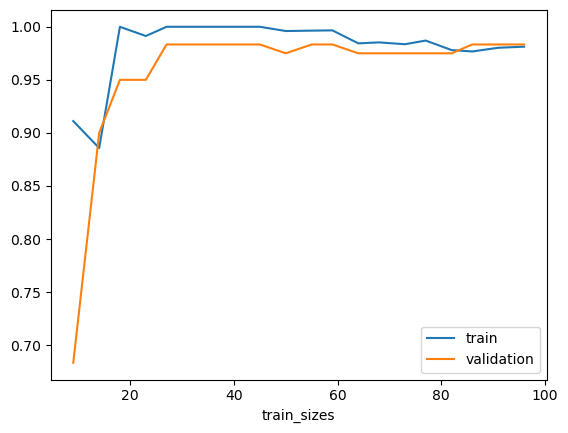

In [51]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()